# Diabetes Prediction Model
<div style="text-align:justify;">

## Introduction
Diabetes is a chronic disease that occurs when the pancreas does not produce adequate insulin or when the body is unable to effectively use the insulin produced. 
## Business Understanding
According to the World Health Organization, there was a 3% increase in age standardized mortality rates from diabetes between 2000 and 2019. In lower income countries it increased to 13%. There are two types of diabetes: type 1 diabetes and type 2 diabetes. Type 1 diabetes is also known as insulin-dependent and is characterized by deficient insulin production by the body. Patients suffering from this require daily administration of insulin. Type 2 diabetes affects the body's use of insulin and leads to high levels of blood sugar. Factors affecting type 2 diabetes include: overweight, genetics, lack of exercise. Keeping a healthy lifestyle is a key component in keeping diabetes away.
### Business Problem
There are certain health indicators that could assist someone in knowing how susceptible they are to suffering from diabetes. Genetics play a role as well as other factors such as lifestyle which includes eating habits, smoking, and exercise. Early intervention is key and would help give preventive care to individuals at high risk and ultimately reduce the number of deaths from diabetes.
### Stakeholders
#### Patients
This includes individuals potentially at risk of suffering from diabetes. This model would help them be aware of their situation and take the necessary steps to address it i.e improve their lifestyle, quit smoking e.t.c
#### Healthcare Providers
Hospitals, clinics, personal doctors fall under this category. Early detection of diabetes goes a long way in managing the disease and healthcare providers can develop the right treatment plan for individuals suffering from the disease.  Through this prediction model patients are able to receive personalized treatment plans.
### Health Insurance Companies 
By identifying populations at high risk of suffering diabetes, insurance companies are able to come up with the right coverage and support for diabetes management particularly in lower income areas.
### Objective
The primary goal is to create a diabetes prediction model that can be used to predict the individuals at risk of suffering from diabetes. By doing this, individuals are able to get early preventive care to reduce the impact of diabetes.
## Data Understanding
The dataset used in this project is sourced from here: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data. It contains 100,000 rows and 9 columns. The 9 columns are:
- Gender
- Age
- Hypertension
- Heart disease
- Smoking history
- BMI
- HbA1c- level (average blood sugar level over the last 2-3 months)
- Blood Glucose level
- Diabetes

All these features play a role in determining the risk of an individual suffering from diabetes. Based on this dataset we will be able to conclude whether an individual is at risk of getting diabetes or not.

In [278]:
# Check dataset size
import pandas as pd

diabetes_df = pd.read_csv("Data/diabetes_prediction_dataset.csv")
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [279]:
# check the shape of the dataset
diabetes_df.shape

(100000, 9)

In [280]:
# Basic description of the dataset
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


The dataset has 100,000 rows and 9 columns with the target column being diabetes where 0 means they do not have diabetes and 1 meaning the individual has diabetes. 

In [281]:
# a basic summary of the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [282]:
# check for missing values
diabetes_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The dataset does not have missing values. Let's check for possible duplicates next.

In [283]:
# check for duplicates
diabetes_df.duplicated().sum()

3854

There are 3854 duplicated rows. This should be addressed before going further.

In [284]:
# Drop duplicates
diabetes_df = diabetes_df.drop_duplicates().copy()

diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


After dropping the duplicate rows we are left with 96146 that we will use for analysis.

In [285]:
# check the balance of gender in the dataset
diabetes_df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

We are interested in male and female gender so we can remove the "other" category that has very few entries.

In [286]:
# Remove rows where the gender value is other
diabetes_df = diabetes_df.loc[diabetes_df['gender'] != 'Other']

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


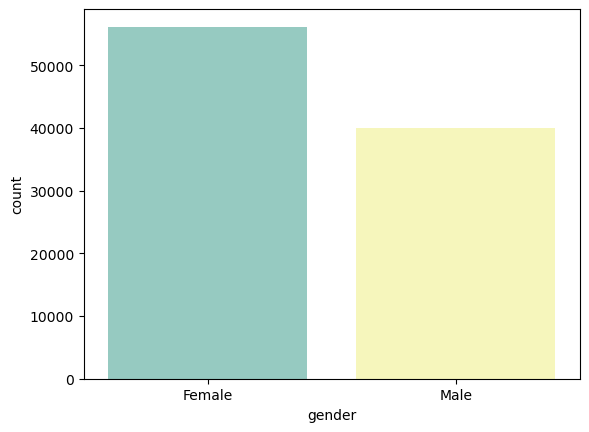

In [287]:
# check the distribution of male and female in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='gender',data=diabetes_df,palette='Set3')
plt.xticks(ticks=[0, 1])
plt.show()

From the visual, it is evident that there are more females than males present in the dataset but it is not heavily imbalanced.

c:\Users\jeffr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


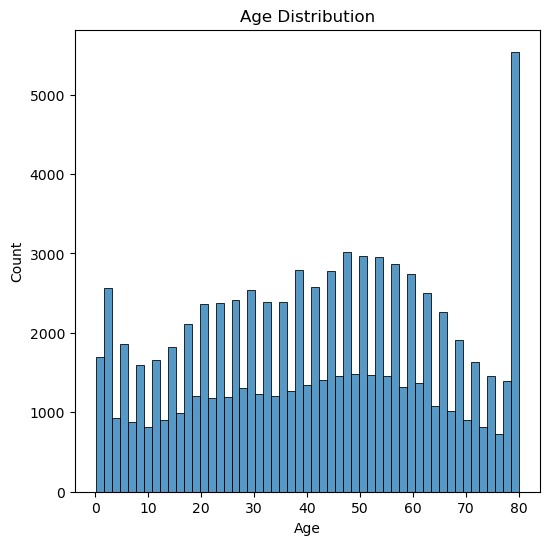

In [288]:
plt.figure(figsize=(6, 6))
sns.histplot(diabetes_df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [289]:
diabetes_df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [290]:
diabetes_df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [291]:
# carry out one hot encoding on categorical columns
from sklearn.preprocessing import OneHotEncoder
categorical_columns = diabetes_df.select_dtypes(include=['object']).columns.tolist()

# Initialize the Encoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one hot encoding on the categorical columns
one_hot_encoded = encoder.fit_transform(diabetes_df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
# Use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

one_hot_df.index = diabetes_df.index  # Ensure the indexes match

# Concatenate the two data frames together
diabetes_encoded = pd.concat([diabetes_df, one_hot_df], axis=1)

# Drop the original categorical columns
diabetes_encoded.drop(categorical_columns, axis=1, inplace=True)


In [292]:
diabetes_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96128 non-null  float64
 1   hypertension                 96128 non-null  int64  
 2   heart_disease                96128 non-null  int64  
 3   bmi                          96128 non-null  float64
 4   HbA1c_level                  96128 non-null  float64
 5   blood_glucose_level          96128 non-null  int64  
 6   diabetes                     96128 non-null  int64  
 7   gender_Female                96128 non-null  float64
 8   gender_Male                  96128 non-null  float64
 9   smoking_history_No Info      96128 non-null  float64
 10  smoking_history_current      96128 non-null  float64
 11  smoking_history_ever         96128 non-null  float64
 12  smoking_history_former       96128 non-null  float64
 13  smoking_history_never

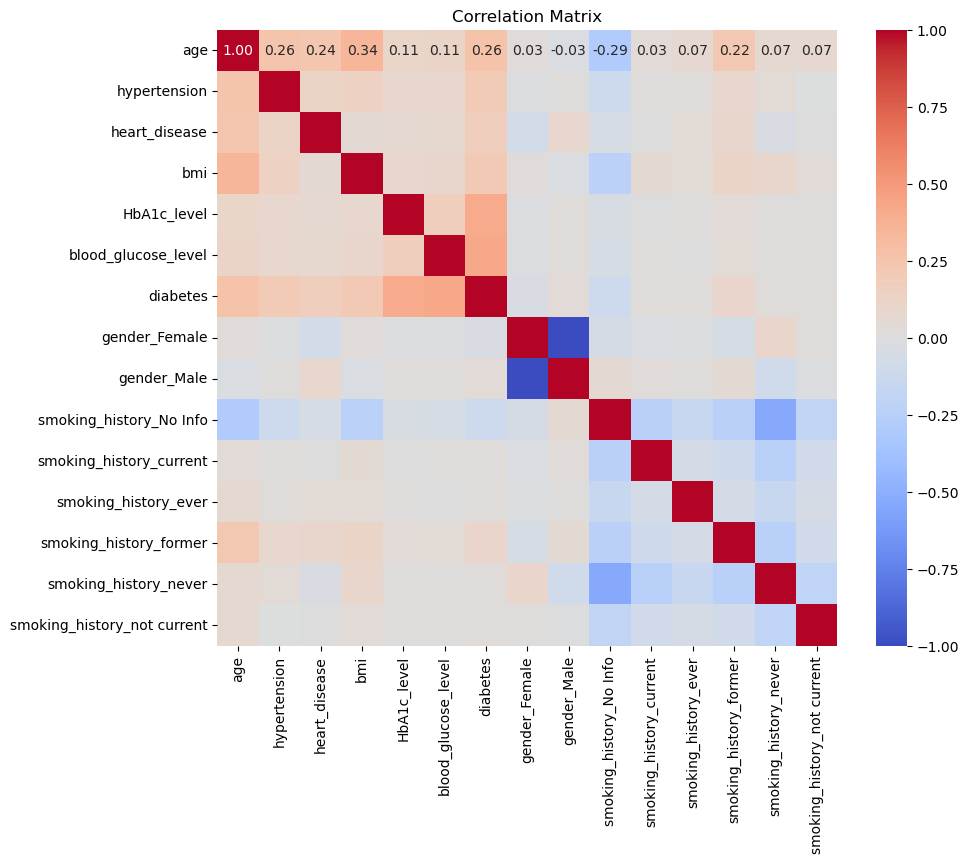

In [293]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()